In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, DayLocator
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from scipy import stats
plt.style.use('ggplot')

In [2]:
data_load = pd.read_csv("OASIS2020.csv")
data_weather = pd.read_csv("2020weather.csv")

data_weather = data_weather.drop(columns=['STATION','REPORT_TYPE','REM','HourlyPresentWeatherType','HourlySkyConditions'])
data_weather = data_weather.fillna(0)
data_weather = data_weather.replace('VRB', 0)
data_weather = data_weather.replace('T', 0)
data_weather = data_weather.replace('*', 0)

In [3]:
data_load = data_load.drop(columns=['Zone Name','Zone PTID'])
data_load['RTD End Time Stamp'] = data_load['RTD End Time Stamp'].apply(lambda x:datetime.strptime(x , "%Y/%m/%d %H:%M:%S").strftime("%Y/%m/%d %H")) 
data_load['RTD End Time Stamp'] = pd.to_datetime(data_load['RTD End Time Stamp'], format='%Y/%m/%d %H')

In [4]:
data_load = data_load.groupby(pd.Grouper(key='RTD End Time Stamp',freq='H')).mean()

In [5]:
data_load = data_load.reset_index()
data_load

,RTD End Time Stamp,RTD Actual Load
0,2020-01-01 00:00:00,4912.181818
1,2020-01-01 01:00:00,4782.291667
2,2020-01-01 02:00:00,4639.833333
3,2020-01-01 03:00:00,4522.441667
4,2020-01-01 04:00:00,4460.575000
...,...,...
8780,2020-12-31 20:00:00,5567.269025
8781,2020-12-31 21:00:00,5390.777133
8782,2020-12-31 22:00:00,5209.144000
8783,2020-12-31 23:00:00,5022.117971


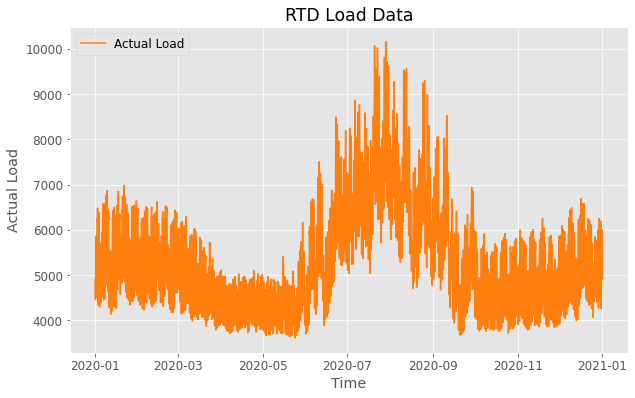

In [6]:
%matplotlib inline

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(data_load['RTD End Time Stamp'], data_load['RTD Actual Load'], color='tab:orange', label='Actual Load')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Actual Load')
ax.set_title('RTD Load Data')
ax.grid(True)
ax.legend(loc='upper left');

In [7]:
data_weather['DATE'] = data_weather['DATE'].apply(lambda x:datetime.strptime(x , "%Y-%m-%dT%H:%M:%S").strftime("%Y/%m/%d %H")) 
data_weather['DATE'] = pd.to_datetime(data_weather['DATE'], format='%Y/%m/%d %H:%M:%S')

In [8]:
data_weather

,DATE,SOURCE,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupEquipment,BackupName,HourlyAltimeterSetting,HourlyDewPointTemperature,...,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REPORT_TYPE.1,SOURCE.1
0,2020-01-01 00:00:00,7,ESE,0.5,mi,SNOW,SNOWBOARD,CENTRAL PARK ZOO,29.66,26.0,...,3.0,58.0,29.64,29.49,10.0,35.0,0,8.0,FM-15,7
1,2020-01-01 01:00:00,7,ESE,0.5,mi,SNOW,SNOWBOARD,CENTRAL PARK ZOO,29.67,27.0,...,0.0,61.0,29.65,29.50,10.0,34.0,280,8.0,FM-15,7
2,2020-01-01 02:00:00,7,ESE,0.5,mi,SNOW,SNOWBOARD,CENTRAL PARK ZOO,29.68,26.0,...,0.0,60.0,29.66,29.51,10.0,34.0,260,14.0,FM-15,7
3,2020-01-01 03:00:00,7,ESE,0.5,mi,SNOW,SNOWBOARD,CENTRAL PARK ZOO,29.70,24.0,...,3.0,55.0,29.67,29.53,10.0,33.0,250,11.0,FM-15,7
4,2020-01-01 04:00:00,7,ESE,0.5,mi,SNOW,SNOWBOARD,CENTRAL PARK ZOO,29.70,23.0,...,0.0,55.0,29.67,29.53,10.0,32.0,0,6.0,FM-15,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,2020-12-31 21:00:00,7,ESE,0.5,mi,SNOW,SNOWBOARD,CENTRAL PARK ZOO,30.40,24.0,...,1.0,59.0,30.37,30.23,10.0,32.0,0,0.0,FM-15,7
11567,2020-12-31 22:00:00,7,ESE,0.5,mi,SNOW,SNOWBOARD,CENTRAL PARK ZOO,30.42,24.0,...,0.0,62.0,30.40,30.25,10.0,32.0,0,5.0,FM-15,7
11568,2020-12-31 23:00:00,7,ESE,0.5,mi,SNOW,SNOWBOARD,CENTRAL PARK ZOO,30.42,23.0,...,0.0,59.0,30.40,30.25,10.0,31.0,0,3.0,FM-15,7
11569,2020-12-31 23:00:00,6,ESE,0.5,mi,SNOW,SNOWBOARD,CENTRAL PARK ZOO,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0,0.0,SOD,6


In [9]:
data_load

,RTD End Time Stamp,RTD Actual Load
0,2020-01-01 00:00:00,4912.181818
1,2020-01-01 01:00:00,4782.291667
2,2020-01-01 02:00:00,4639.833333
3,2020-01-01 03:00:00,4522.441667
4,2020-01-01 04:00:00,4460.575000
...,...,...
8780,2020-12-31 20:00:00,5567.269025
8781,2020-12-31 21:00:00,5390.777133
8782,2020-12-31 22:00:00,5209.144000
8783,2020-12-31 23:00:00,5022.117971


In [10]:
merge = pd.merge(data_load, data_weather, how='inner', left_on='RTD End Time Stamp', right_on='DATE')

In [11]:
labelencoder = LabelEncoder()
merge['BackupDirection'] = labelencoder.fit_transform(merge['BackupDirection'])
merge['BackupDistanceUnit'] = labelencoder.fit_transform(merge['BackupDistanceUnit'])
merge['BackupElements'] = labelencoder.fit_transform(merge['BackupElements'])
merge['BackupEquipment'] = labelencoder.fit_transform(merge['BackupEquipment'])
merge['BackupName'] = labelencoder.fit_transform(merge['BackupName'])
merge['REPORT_TYPE.1'] = labelencoder.fit_transform(merge['REPORT_TYPE.1'])

In [12]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [13]:
merge = merge.drop(columns=['DATE','RTD End Time Stamp'])

In [14]:
clean_dataset(merge)

,RTD Actual Load,SOURCE,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupEquipment,BackupName,HourlyAltimeterSetting,HourlyDewPointTemperature,...,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,REPORT_TYPE.1,SOURCE.1
0,4912.181818,7.0,0.0,0.5,0.0,0.0,0.0,0.0,29.66,26.0,...,3.0,58.0,29.64,29.49,10.0,35.0,0.0,8.0,0.0,7.0
1,4782.291667,7.0,0.0,0.5,0.0,0.0,0.0,0.0,29.67,27.0,...,0.0,61.0,29.65,29.50,10.0,34.0,280.0,8.0,0.0,7.0
2,4639.833333,7.0,0.0,0.5,0.0,0.0,0.0,0.0,29.68,26.0,...,0.0,60.0,29.66,29.51,10.0,34.0,260.0,14.0,0.0,7.0
3,4522.441667,7.0,0.0,0.5,0.0,0.0,0.0,0.0,29.70,24.0,...,3.0,55.0,29.67,29.53,10.0,33.0,250.0,11.0,0.0,7.0
4,4460.575000,7.0,0.0,0.5,0.0,0.0,0.0,0.0,29.70,23.0,...,0.0,55.0,29.67,29.53,10.0,32.0,0.0,6.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11566,5390.777133,7.0,0.0,0.5,0.0,0.0,0.0,0.0,30.40,24.0,...,1.0,59.0,30.37,30.23,10.0,32.0,0.0,0.0,0.0,7.0
11567,5209.144000,7.0,0.0,0.5,0.0,0.0,0.0,0.0,30.42,24.0,...,0.0,62.0,30.40,30.25,10.0,32.0,0.0,5.0,0.0,7.0
11568,5022.117971,7.0,0.0,0.5,0.0,0.0,0.0,0.0,30.42,23.0,...,0.0,59.0,30.40,30.25,10.0,31.0,0.0,3.0,0.0,7.0
11569,5022.117971,6.0,0.0,0.5,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,2.0,6.0


(array([  420.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11150.]),
 array([ 0.   ,  3.076,  6.152,  9.228, 12.304, 15.38 , 18.456, 21.532,
        24.608, 27.684, 30.76 ]),
 <BarContainer object of 10 artists>)

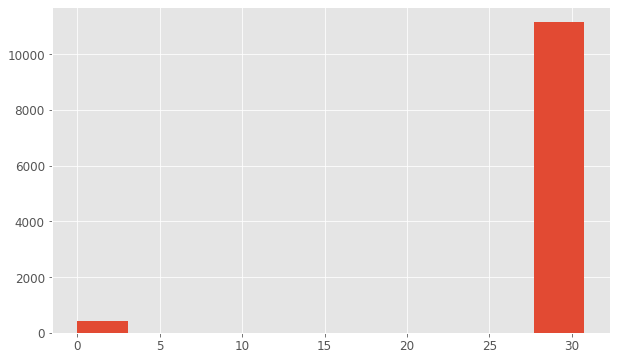

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(merge['HourlyAltimeterSetting'])

<AxesSubplot:>

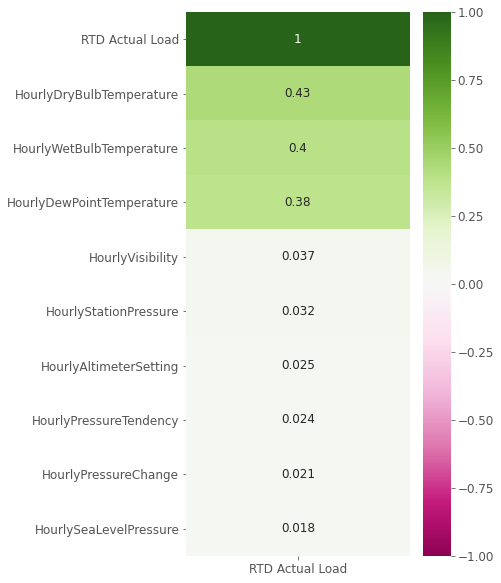

In [24]:
corr_new_train=merge.corr()
plt.figure(figsize=(5,10))
sb.heatmap(corr_new_train[['RTD Actual Load']].sort_values(by=['RTD Actual Load'],ascending=False).head(10),vmin=-1, cmap='PiYG', annot=True)

# Model

Linear Regression

In [16]:
X_train = np.array(merge.drop(columns=['RTD Actual Load']))
y = np.array(merge['RTD Actual Load'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

In [17]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.29909465396388535

In [18]:
reg.score(X_val, y_val)

0.22428115911775348

lightGBM

In [19]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lgb_regressor=lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=500, 
                                learning_rate=0.002, n_estimators=4500, max_bin=500, bagging_fraction=0.8,
                                bagging_freq=5, bagging_seed=9, feature_fraction=0.7, feature_fraction_seed=9, 
                                min_data_in_leaf=6, min_sum_hessian_in_leaf = 10, reg_lambda=0.1, n_jobs=-1)
lgb_regressor.fit(X_train,y_train)
y_head=lgb_regressor.predict(X_val)
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_val,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_val,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_val,y_head))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=10, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=10
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
----------LGBM----------
R square Accuracy:  0.7363586503958707
Mean Absolute Error Accuracy:  432.87808125108694
Mean Squared Error Accuracy:  324105.92598389706


In [20]:
#y_val = y_val.tolist()
#y_head = y_head.tolist()

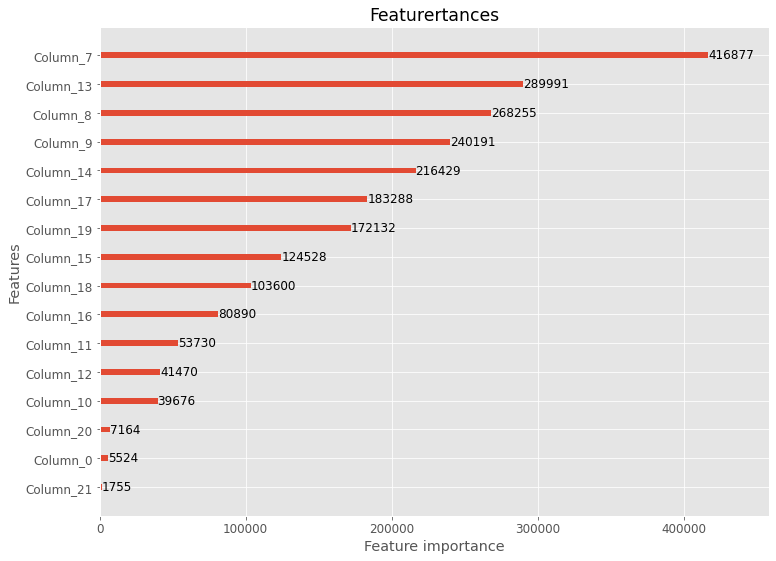

In [21]:
lgb.plot_importance(lgb_regressor, max_num_features=30, figsize=(12,9))
plt.title("Featurertances")
plt.show()